#**Giới thiệu dữ liệu ngoại lai (outliers)**

1.   **Giới thiệu dữ liệu ngoại lai:**
Dữ liệu ngoại lai (outlier) là dữ liệu có
sự khác biệt đáng kể so với phần còn lại của tập dữ liệu. Dữ liệu ngoại lai có thể ảnh hưởng đến hiệu suất của một số mô hình học máy, chẳng hạn như hồi quy tuyến tính (linear regression) hoặc AdaBoost. Do đó, chúng ta có thể cần loại bỏ hoặc xử lý các giá trị ngoại lai trong các biến của tập dữ liệu.
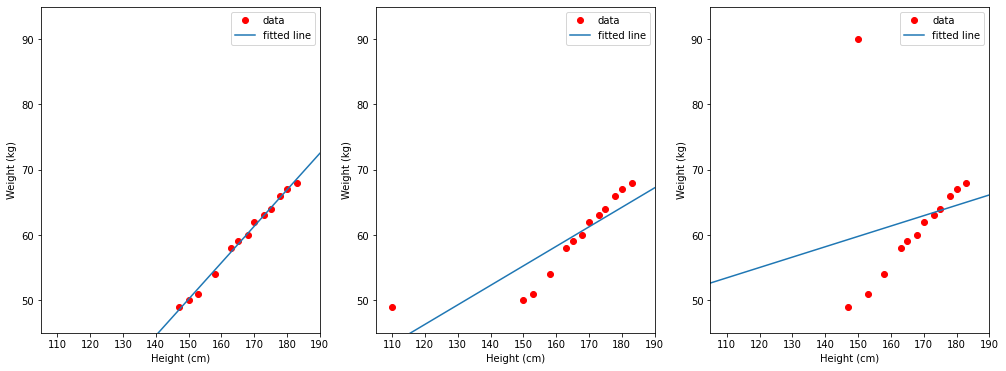
Các điểm màu đỏ thể hiện các điểm dữ liệu với trục hoành là cân nặng và trục tung là chiều cao. Đường thẳng màu xanh là đường thằng mà mô hình hồi quy tuyến tính học được. Ta có thể thấy rằng đường màu xanh trong hình bên trái khá khớp dữ liệu, trong khi hai đường thẳng ở hai trường hợp còn lại bị lệch đi khá nhiều dù chỉ có một điểm dữ liệu ngoại lệ trong mỗi trường hợp.
Như vậy, với dữ liệu rất đơn giản này, dữ liệu ngoại lệ dù ở đầu vào mô hình hay nhãn đều mang lại kết quả không tốt.
2.   **Các phương pháp thực hiện:**
Trong đề tài này sẽ tìm hiểu 3 phương pháp như sau:
- Phương pháp Trimming: Xác định và loại bỏ các giá trị ngoại lai khỏi tập dữ liệu.
- Phương pháp Winsorization: Chuyển đổi dữ liệu bằng cách giới hạn các giá trị ngoại lệ (outliers), tức là những giá trị cực trị, về một giá trị nhất định, gần với giá trị ngưỡng của tập dữ liệu;
-	Phương pháp Zero- Coding: Giới hạn biến ở mức tối thiểu bằng 0.

# **Tập dữ liệu (Dataset)**



*  **Giới thiệu về tập dữ liệu Boston house-price**: Tập dữ liệu Boston house-price được sử dụng phổ biến trong các nghiên cứu về hồi quy và dự đoán giá nhà. Nó được lấy từ bài báo khoa học của Harrison và Rubinfeld (1978), với mục tiêu phân tích giá trị nhà và mối quan hệ giữa các yếu tố kinh tế, môi trường và xã hội. Dữ liệu cũng xuất hiện trong cuốn "Regression Diagnostics" của Belsley, Kuh và Welsch (1980), với nhiều phép biến đổi để kiểm tra các mô hình hồi quy.
*   Tập dữ liệu bao gồm 506 mẫu, mỗi mẫu đại diện cho một khu vực (tract) ở thành phố Boston, Mỹ. Dữ liệu có 14 biến số, trong đó 13 biến đầu là biến độc lập (đặc điểm), và biến cuối cùng là biến phụ thuộc (giá trị trung bình của nhà ở khu vực đó). Cụ thể như sau:
*   CRIM: Tỷ lệ tội phạm trên đầu người theo từng khu vực. Khu vực có tỷ lệ tội phạm cao thường có giá nhà thấp, do tội phạm ảnh hưởng tiêu cực đến chất lượng sống.
*   ZN: Tỷ lệ đất quy hoạch cho nhà ở có diện tích lớn hơn 25,000 bộ vuông. Giá nhà thường cao hơn ở các khu vực có nhiều đất dành cho nhà ở diện tích lớn, do đây thường là những khu vực giàu có.
*   INDUS: Tỷ lệ diện tích đất phi thương mại (khu công nghiệp) theo từng khu vực. Khu vực có tỷ lệ công nghiệp cao thường có giá nhà thấp hơn do các yếu tố ô nhiễm và tiếng ồn.
*   CHAS: Biến giả cho sông Charles (CHAS = 1 nếu khu vực giáp sông, = 0 nếu không). Khu vực gần sông thường có giá nhà cao hơn do cảnh quan và tiện ích môi trường.
*   NOX: Nồng độ oxit nitric (phần trên 10 triệu). Nồng độ NOX cao cho thấy mức độ ô nhiễm không khí, làm giảm giá trị nhà.
*   RM: Số phòng trung bình trên mỗi căn nhà. Số lượng phòng cao thường đi kèm với giá nhà cao, do diện tích lớn hơn và tiện nghi tốt hơn.
*   AGE: Tỷ lệ phần trăm nhà ở thuộc sở hữu cá nhân được xây trước năm 1940. Nhà cũ thường có giá trị thấp hơn, trừ khi nằm trong khu vực có giá trị lịch sử.
*   DIS: Khoảng cách trung bình từ khu vực đến 5 trung tâm việc làm ở Boston (đã được trọng số). Khoảng cách càng gần các trung tâm kinh tế, giá nhà càng cao.
*   RAD: Chỉ số tiếp cận với đường cao tốc xuyên tâm. Giá nhà thường cao hơn ở khu vực dễ dàng tiếp cận giao thông, nhưng giá trị này có thể giảm nếu giao thông gây ồn ào.

*   TAX: Tỷ lệ thuế bất động sản trên $10,000. Thuế cao thường làm giảm giá trị nhà ở.

*   PTRATIO: Tỷ lệ học sinh trên giáo viên trong từng khu vực.Tỷ lệ thấp thường thể hiện chất lượng giáo dục cao hơn, giúp tăng giá nhà.
*   B: Chỉ số liên quan đến tỷ lệ người da đen trong khu vực. Giá nhà bị ảnh hưởng bởi các yếu tố xã hội và nhân khẩu học, có thể bao gồm yếu tố thiên kiến tại thời điểm nghiên cứu.
*   LSTAT: Tỷ lệ phần trăm dân số thuộc tầng lớp thu nhập thấp. Tỷ lệ này cao thường đi kèm với giá nhà thấp.
*   MEDV: Giá trị trung bình (Median value) của nhà ở (đơn vị: $1,000). Đây là biến mục tiêu trong phân tích. Phản ánh chất lượng và các yếu tố kinh tế - xã hội tổng hợp của khu vực.
*   Nhận xét tổng quát về tập dữ liệu: Tập dữ liệu này không chỉ được dùng để phân tích giá nhà mà còn cung cấp thông tin về mối liên hệ giữa kinh tế, xã hội và môi trường trong các khu vực đô thị. Nó đã được sử dụng rộng rãi trong nhiều nghiên cứu và là một tập dữ liệu kinh điển để minh họa các mô hình hồi quy.





#**Phương pháp Trimming**

1.   **Phương pháp Trimming**: Hay còn gọi là truncating, là quá trình loại bỏ các giá trị ngoại lai (outliers) trong một hoặc nhiều biến của tập dữ liệu. Đây là bước quan trọng nhằm cải thiện chất lượng dữ liệu và giảm thiểu ảnh hưởng tiêu cực của các giá trị bất thường đến phân tích và mô hình học máy.
2.   **Phương pháp thực hiện**: Có nhiều phương pháp để loại bỏ các giá trị ngoại lai. Trong phần này giới thiệu các phương pháp thống kê để loại bỏ các giá trị ngoại lai như sau:
- Phương pháp tứ phân vị (IRQ)
- Phương pháp tính giá trị trung bình (mean) và độ lệch chuẩn (Standard Deviation).
2.1. Phương pháp tứ phân vị (IRQ): sử dụng để loại bỏ các giá trị ngoại lai. Tứ phân vị là đại lượng mô tả sự phân bố và sự phân tán của tập dữ liệu. Tứ phân vị có 3 giá trị, đó là tứ phân vị thứ nhất Q1 (25th), thứ hai Q2 (50th) hay median, và thứ ba Q3 (75th). Ba giá trị này chia một tập hợp dữ liệu (đã sắp xếp dữ liệu theo trật từ từ bé đến lớn) thành 4 phần có số lượng quan sát đều nhau. Tứ phân vị được xác định như sau:
- Sắp xếp các giá trị theo thứ tự tăng dần
- Cắt dãy giá trị thành 4 phần bằng nhau
- Tứ phân vị là các giá trị tại vị trí cắt.



In [ ]:
import pandas as pd  # Hỗ trợ phân tích và xử lý dữ liệu dạng bảng
import numpy as np  # Thư viện để xử lý các phép toán số học và mảng
import matplotlib.pyplot as plt  # Thư viện trực quan hóa dữ liệu bằng đồ thị
import seaborn as sns  # Bổ sung cho Matplotlib để tạo các đồ thị phức tạp hơn
from google.colab import drive
import os  # Thư viện để thao tác với hệ thống tệp
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Colab Notebooks/bostonData.csv'
if os.path.exists(dataset_path):
    print(f"File {dataset_path} đã được tìm thấy.")
    # Đọc dữ liệu từ file CSV
    boston = pd.read_csv(dataset_path)
else:
    print(f"File {dataset_path} không tồn tại.")
# Hiển thị 5 dòng đầu tiên của dữ liệu
boston.head()



Mounted at /content/drive
File /content/drive/MyDrive/Colab Notebooks/bostonData.csv đã được tìm thấy.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


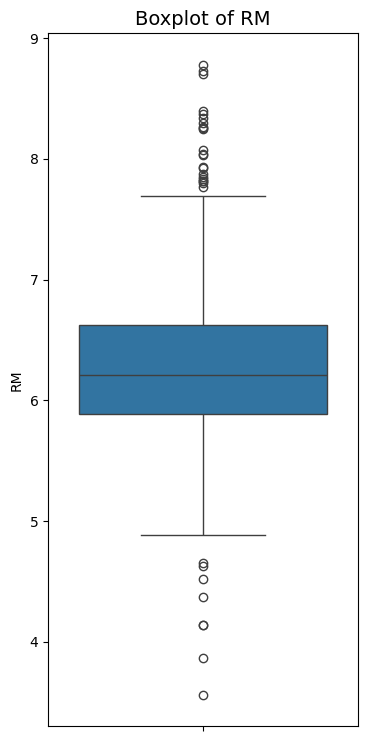

In [ ]:
# Vẽ biểu đồ boxplot của cột 'RM'
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Tạo hàm find_boundaries để tính giới hạn trên (upper boundary) và giới hạn dưới (lower boundary) của biến (variable) trong tập dữ liệu, dựa trên quy tắc khoảng tứ phân vị (inter-quartile range proximity rule)

In [ ]:
#df (DataFrame): Dữ liệu nguồn
#variable (str): Tên cột cần tính
#distance (float): Hệ số khoảng cách distance=1.5 (IRQ)
def find_boundaries(df, variable, distance):
      # Sử dụng khoảng tứ phân vị (IQR)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * distance)
    upper_boundary = Q3 + (IQR * distance)

    return upper_boundary, lower_boundary

# Tính ranh giới bằng phương pháp IQR
RM_upper_limit, RM_lower_limit = find_boundaries(boston,'RM', 1.5)
print(f"Upper Boundary of RM: {RM_upper_limit}, Lower Boundary of RM: {RM_lower_limit}")


Upper Boundary of RM: 7.730500000000001, Lower Boundary of RM: 4.778499999999999


Sau khi xác định được giới hạn trên (upper limit) và giới hạn dưới (lower limit) cho cột RM bằng quy tắc IQR, bước tiếp theo là gắn cờ (flag) để đánh dấu các giá trị ngoại lai trong cột đó

In [ ]:
# Gắn cờ ngoại lai bằng Boolean vector
## Nếu lớn hơn giới hạn trên hoặc Nếu nhỏ hơn giới hạn dưới -> True
outliers_RM_Distance1_5 = np.where(
    boston['RM'] > RM_upper_limit, True,
    np.where(
        boston['RM'] < RM_lower_limit, True,
        False  # Nếu nằm trong giới hạn -> False
    )
)
# Thêm cột mới vào DataFrame để dễ theo dõi
boston['Outlier_RM_Distance_1.5'] = outliers_RM_Distance1_5

# In các giá trị ngoại lai và cột gán cờ vừa thêm vào
print("Các giá trị ngoại lai trong cột RM:")
print(boston[boston['Outlier_RM_Distance_1.5']])

Các giá trị ngoại lai trong cột RM:
         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD  TAX  \
97    0.12083   0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403   
180   0.06588   0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193   
186   0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193   
195   0.01381  80.0   0.46     0  0.4220  7.875   32.0  5.6484    4  255   
203   0.03510  95.0   2.68     0  0.4161  7.853   33.2  5.1180    4  224   
204   0.02009  95.0   2.68     0  0.4161  8.034   31.9  5.1180    4  224   
224   0.31533   0.0   6.20     0  0.5040  8.266   78.3  2.8944    8  307   
225   0.52693   0.0   6.20     0  0.5040  8.725   83

Bước tiếp theo là loại bỏ các giá trị ngoại lai (outliers) ra khỏi dataset. Điều này giúp dữ liệu trở nên "sạch" hơn, tránh các giá trị bất thường làm ảnh hưởng đến các phân tích hoặc mô hình sau này.

Kích thước dữ liệu ban đầu: (506, 15)
Kích thước dữ liệu sau khi loại bỏ ngoại lai: (476, 15)


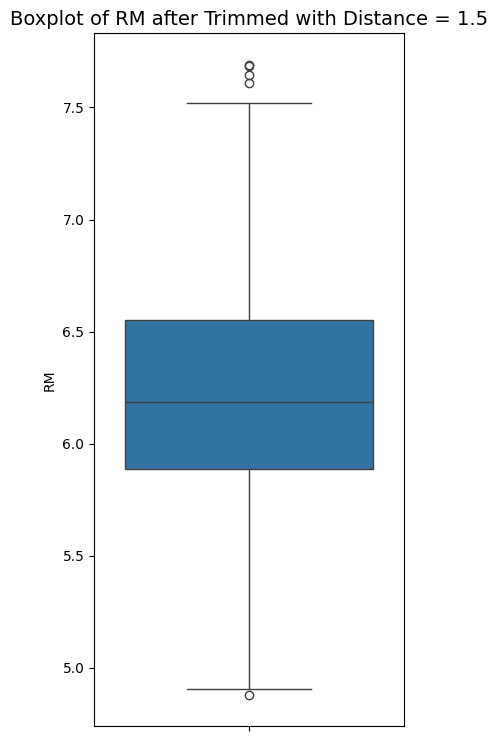

In [ ]:
# Loại bỏ các giá trị ngoại lai khỏi dataset
boston_trimmed_Distance1_5 = boston.loc[~outliers_RM_Distance1_5]  # Dữ liệu đã loại bỏ ngoại lai
# In kích thước của dataset trước và sau khi loại bỏ ngoại lai
print("Kích thước dữ liệu ban đầu:", boston.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lai:",boston_trimmed_Distance1_5.shape)

# Vẽ biểu đồ boxplot của cột 'RM' sau khi loại bỏ ngoại lai
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston_trimmed_Distance1_5['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM after Trimmed with Distance = 1.5', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Nhìn vào kết quả của đồ thị BoxPlot thì vẫn tồn tại điểm ngoại lai (Outliers) nên sử dụng distance = 2.0 để điều chỉnh và kiểm tra kết quả.

Distance = 2.0 => Upper Boundary of RM : 8.0995, Lower Boundary of RM : 4.409499999999999
Kích thước dữ liệu ban đầu: (506, 16)
Kích thước dữ liệu sau khi loại bỏ ngoại lai: (491, 16)


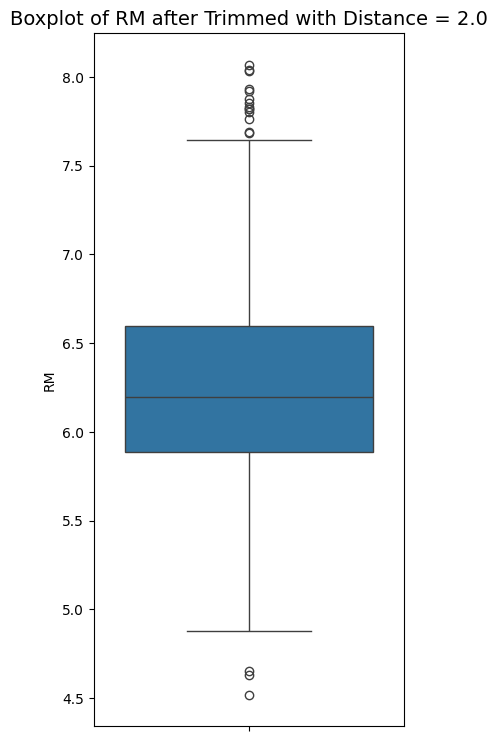

In [ ]:
# Tính ranh giới bằng phương pháp IQR
RM_upper_limit, RM_lower_limit = find_boundaries(boston,'RM', 2)
print(f"Distance = 2.0 => Upper Boundary of RM : {RM_upper_limit}, Lower Boundary of RM : {RM_lower_limit}")

# Gắn cờ ngoại lai bằng Boolean vector
## Nếu lớn hơn giới hạn trên hoặc Nếu nhỏ hơn giới hạn dưới -> True
outliers_RM_Distance2 = np.where(
    boston['RM'] > RM_upper_limit, True,
    np.where(
        boston['RM'] < RM_lower_limit, True,
        False  # Nếu nằm trong giới hạn -> False
    )
)
# Thêm cột mới vào DataFrame để dễ theo dõi
boston['Outlier_RM_Distance=2'] = outliers_RM_Distance2

# Loại bỏ các giá trị ngoại lai khỏi dataset
boston_trimmed_Distance2 = boston.loc[~outliers_RM_Distance2]  # Dữ liệu đã loại bỏ ngoại lai
# In kích thước của dataset trước và sau khi loại bỏ ngoại lai
print("Kích thước dữ liệu ban đầu:", boston.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lai:", boston_trimmed_Distance2.shape)

# Vẽ biểu đồ boxplot của cột 'RM' sau khi loại bỏ ngoại lai
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston_trimmed_Distance2['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM after Trimmed with Distance = 2.0', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Nhìn vào kết quả của đồ thị BoxPlot thì vẫn tồn tại điểm ngoại lai (Outliers) khi sử dụng distance = 1.5 và 2.0 là tương đồng nhau nên điều chỉnh distance = 1 để kiểm tra kết quả.

Distance = 1.0 => Upper Boundary of RM : 7.3615, Lower Boundary of RM : 5.147499999999999
Kích thước dữ liệu ban đầu: (506, 17)
Kích thước dữ liệu sau khi loại bỏ ngoại lai: (452, 17)


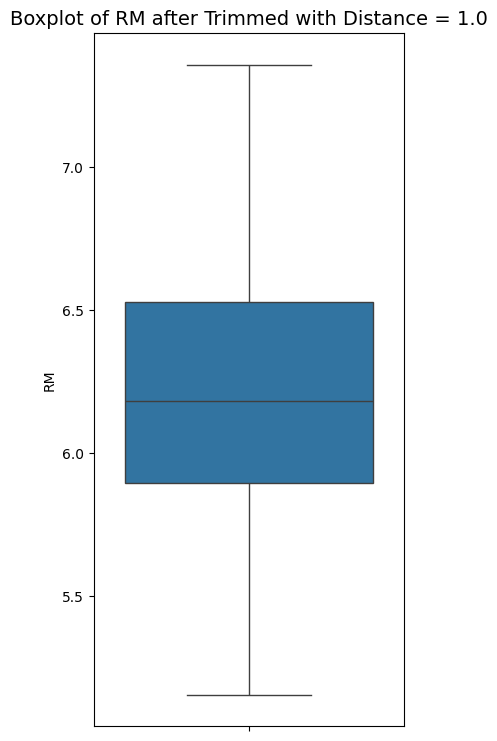

In [ ]:
# Tính ranh giới bằng phương pháp IQR, distance =1
RM_upper_limit, RM_lower_limit = find_boundaries(boston,'RM', 1)
print(f"Distance = 1.0 => Upper Boundary of RM : {RM_upper_limit}, Lower Boundary of RM : {RM_lower_limit}")

# Gắn cờ ngoại lai bằng Boolean vector
## Nếu lớn hơn giới hạn trên hoặc Nếu nhỏ hơn giới hạn dưới -> True
outliers_RM_Distance1 = np.where(
    boston['RM'] > RM_upper_limit, True,
    np.where(
        boston['RM'] < RM_lower_limit, True,
        False  # Nếu nằm trong giới hạn -> False
    )
)
# Thêm cột mới vào DataFrame để dễ theo dõi
boston['Outlier_RM_Distance=1'] = outliers_RM_Distance1

# Loại bỏ các giá trị ngoại lai khỏi dataset
boston_trimmed_Distance1 = boston.loc[~outliers_RM_Distance1]  # Dữ liệu đã loại bỏ ngoại lai
# In kích thước của dataset trước và sau khi loại bỏ ngoại lai
print("Kích thước dữ liệu ban đầu:", boston.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lai:", boston_trimmed_Distance1.shape)

# Vẽ biểu đồ boxplot của cột 'RM' sau khi loại bỏ ngoại lai
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston_trimmed_Distance1['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM after Trimmed with Distance = 1.0', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Kết luận: IQR (Khoảng cách giữa phần tử phân vị thứ 75 và thứ 25) giúp xác định phạm vi nơi phần lớn các dữ liệu phân bố. Cụ thể:
Lower limit = Q1 - (IQR * distance)
Upper limit = Q3 + (IQR * distance)
Khi distance = 1, phạm vi phân bố của tập dữ liệu hẹp hơn, giúp loại bỏ những giá trị xa khỏi trung bình và phân vị. Điều này dẫn đến việc tăng khả năng loại bỏ các ngoại lai.
Khi distance tăng lên 1.5 hay 2, phạm vi phân bố của tập dữ liệu rộng và có thể dẫn đến việc giữ lại nhiều giá trị mà đáng lẽ nên được coi là ngoại lai. Vì vậy, distance = 1 có thể loại bỏ ngoại lai hiệu quả hơn khi dữ liệu có sự phân tán nhỏ hoặc phân phối gần chuẩn.


2.1. Loại bỏ ngoại lai bằng phương pháp tính trung bình (mean) và độ lệch chuẩn (standard deviation): Phương pháp này sử dụng giá trị trung bình (Mean) và độ lệch chuẩn (Standard Deviation) để xác định các giá trị ngoại lai trong tập dữ liệu.
*   Giá trị trung bình (Mean): Là giá trị đại diện cho trung tâm của dữ liệu, tính bằng cách lấy tổng tất cả các giá trị chia cho số lượng giá trị.
*   Độ lệch chuẩn (Standard Deviation): Đo lường mức độ phân tán của dữ liệu so với giá trị trung bình. Độ lệch chuẩn càng lớn, dữ liệu càng phân tán, và ngược lại.

In [ ]:
#df (DataFrame): Dữ liệu nguồn
#variable (str): Tên cột cần tính
#distance (float): Hệ số nhân độ lệch chuẩn
# Hàm tính giới hạn bất thường dựa trên Mean và Standard Deviation
def find_boundaries_mean_std(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

# Hàm tính giới hạn bất thường dựa trên Quantiles
def find_boundaries_quantiles(df, variable):
    lower_boundary = df[variable].quantile(0.05)  # Phân vị 5%
    upper_boundary = df[variable].quantile(0.95)  # Phân vị 95%
    return upper_boundary, lower_boundary

# Tính giới hạn bất thường cho cột 'RM' sử dụng Mean và Standard Deviation
distance = 1.5  # Hệ số nhân độ lệch chuẩn
rm_upper_mean_std, rm_lower_mean_std = find_boundaries_mean_std(boston, 'RM', distance)

# Tính giới hạn bất thường cho cột 'RM' sử dụng Quantiles
rm_upper_quantile, rm_lower_quantile = find_boundaries_quantiles(boston, 'RM')

# In kết quả
print("Giới hạn bất thường dựa trên Mean và Std:")
print(f"Giới hạn trên: {rm_upper_mean_std}")
print(f"Giới hạn dưới: {rm_lower_mean_std}\n")

print("Giới hạn bất thường dựa trên Quantiles:")
print(f"Giới hạn trên: {rm_upper_quantile}")
print(f"Giới hạn dưới: {rm_lower_quantile}")


Giới hạn bất thường dựa trên Mean và Std:
Giới hạn trên: 7.338560102474764
Giới hạn dưới: 5.230708672228793

Giới hạn bất thường dựa trên Quantiles:
Giới hạn trên: 7.5875
Giới hạn dưới: 5.314


In [ ]:
# Kiểm tra ngoại lệ cho RM dựa trên Mean và Std
outliers_RM_mean_std = np.where(boston['RM'] > rm_upper_mean_std, True,
                       np.where(boston['RM'] < rm_lower_mean_std, True, False))

# Kiểm tra ngoại lệ cho RM dựa trên Quantiles
outliers_RM_quantile = np.where(boston['RM'] > rm_upper_quantile, True,
                       np.where(boston['RM'] < rm_lower_quantile, True, False))

Kích thước dữ liệu ban đầu: (506, 17)
Kích thước dữ liệu sau khi loại bỏ ngoại lai: (449, 17)


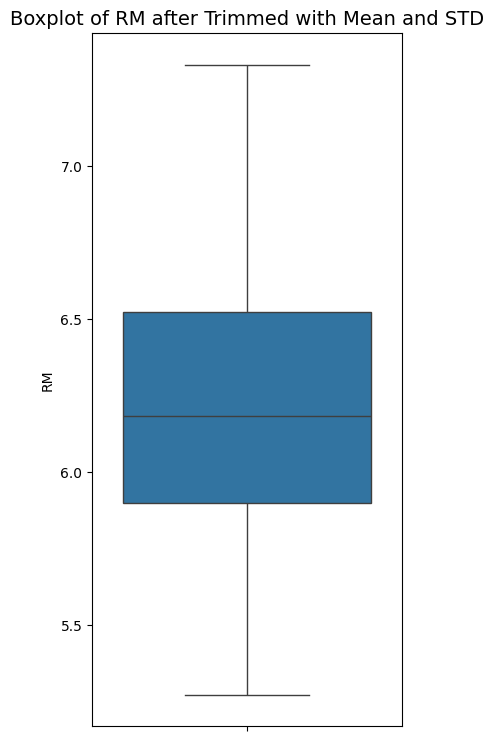

In [ ]:
# Loại bỏ các giá trị ngoại lai khỏi dataset bằng Mean và Std
boston_trimmed_mean_stb = boston.loc[~outliers_RM_mean_std]  # Dữ liệu đã loại bỏ ngoại lai
# In kích thước của dataset trước và sau khi loại bỏ ngoại lai
print("Kích thước dữ liệu ban đầu:", boston.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lai:",boston_trimmed_mean_stb.shape)

# Vẽ biểu đồ boxplot của cột 'RM' sau khi loại bỏ ngoại lai
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston_trimmed_mean_stb['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM after Trimmed with Mean and STD', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Kích thước dữ liệu ban đầu: (506, 17)
Kích thước dữ liệu sau khi loại bỏ ngoại lai: (454, 17)


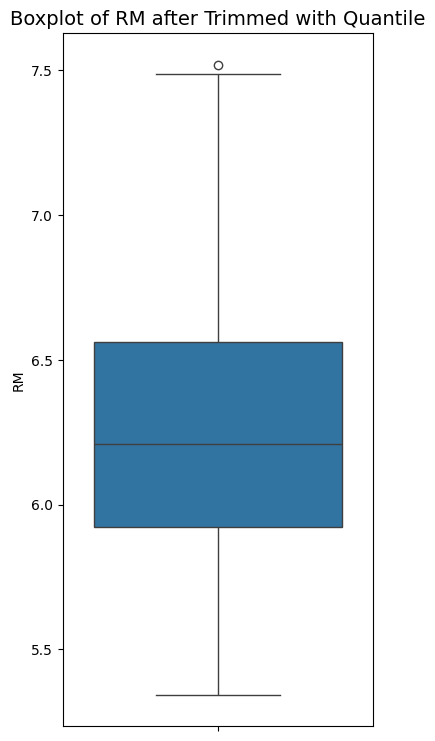

In [ ]:
# Loại bỏ các giá trị ngoại lai khỏi dataset bằng quantile
boston_trimmed_quantile = boston.loc[~outliers_RM_quantile]  # Dữ liệu đã loại bỏ ngoại lai
# In kích thước của dataset trước và sau khi loại bỏ ngoại lai
print("Kích thước dữ liệu ban đầu:", boston.shape)
print("Kích thước dữ liệu sau khi loại bỏ ngoại lai:",boston_trimmed_quantile.shape)

# Vẽ biểu đồ boxplot của cột 'RM' sau khi loại bỏ ngoại lai
plt.figure(figsize=(4, 9))  # Tùy chỉnh kích thước biểu đồ
sns.boxplot(y=boston_trimmed_quantile['RM'])

# Hiển thị biểu đồ
plt.title('Boxplot of RM after Trimmed with Quantile', fontsize=14)

# Hiển thị biểu đồ
plt.show()

Nhận xét: Với phương pháp mean và std (Distance = 1.5) có thể dễ dàng nhận diện các ngoại lệ tốt hơn phương pháp quantile (Do tập dữ liệu phân phối chuẩn). Tuy nhiên, với những giá trị dữ liệu có phân phối lệch, kết quả có thể không chính xác.
Với phương pháp quantiles, cách xác định giá trị ngoại lệ ít bị ảnh hưởng bởi các giá trị cực đoan, nhưng phương pháp này có thể bỏ qua các mẫu dữ liệu quan trọng nếu dữ liệu là phân phối chuẩn.

# **Phương pháp Winsorization**

**Winsorization** (hay còn gọi là **winsorizing**) là phương pháp chuyển đổi dữ liệu bằng cách giới hạn các giá trị ngoại lệ (outliers), tức là chuyển những giá trị cực trị, về một giá trị nhất định, gần với giá trị trung bình của phân phối dữ liệu. Phương pháp này khác với **trimming** vì trong khi trimming loại bỏ các giá trị ngoại lệ khỏi dữ liệu, Winsorization thay thế các giá trị này bằng một giá trị khác trong phạm vi phân bố hợp lý của dữ liệu.
Ví dụ, với **90% Winsorization**, ta sẽ thay tất cả các giá trị dưới phần trăm thứ 5 của dữ liệu bằng giá trị tại phần trăm thứ 5 và thay tất cả các giá trị trên phần trăm thứ 95 của dữ liệu bằng giá trị tại phần trăm thứ 95.

In [ ]:
import pandas as pd  # Hỗ trợ phân tích và xử lý dữ liệu dạng bảng
import numpy as np  # Thư viện để xử lý các phép toán số học và mảng
import matplotlib.pyplot as plt  # Thư viện trực quan hóa dữ liệu bằng đồ thị
import seaborn as sns  # Bổ sung cho Matplotlib để tạo các đồ thị phức tạp hơn
from google.colab import drive
import os  # Thư viện để thao tác với hệ thống tệp
from scipy import stats  #


drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Colab Notebooks/bostonData.csv'
if os.path.exists(dataset_path):
    print(f"File {dataset_path} đã được tìm thấy.")
    # Đọc dữ liệu từ file CSV
    boston = pd.read_csv(dataset_path)
else:
    print(f"File {dataset_path} không tồn tại.")
# Hiển thị 5 dòng đầu tiên của dữ liệu
boston.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File /content/drive/MyDrive/Colab Notebooks/bostonData.csv đã được tìm thấy.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Chọn ba cột 'RM', 'LSTAT', và 'CRIM' từ dữ liệu
boston = boston[['RM', 'LSTAT', 'CRIM']]

# Hiển thị lại 5 dòng đầu tiên của dữ liệu đã được chọn cột
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


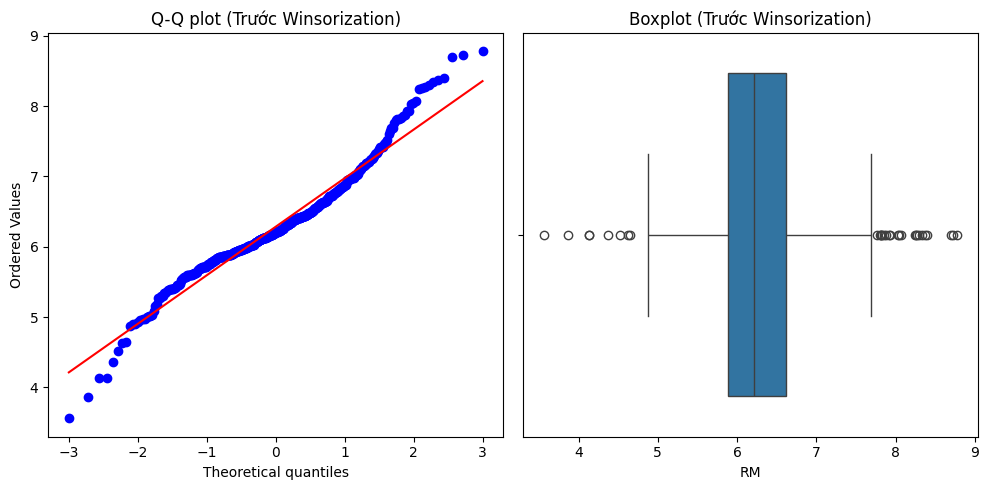

Số lượng giá trị bị thay thế trong biến RM: 52


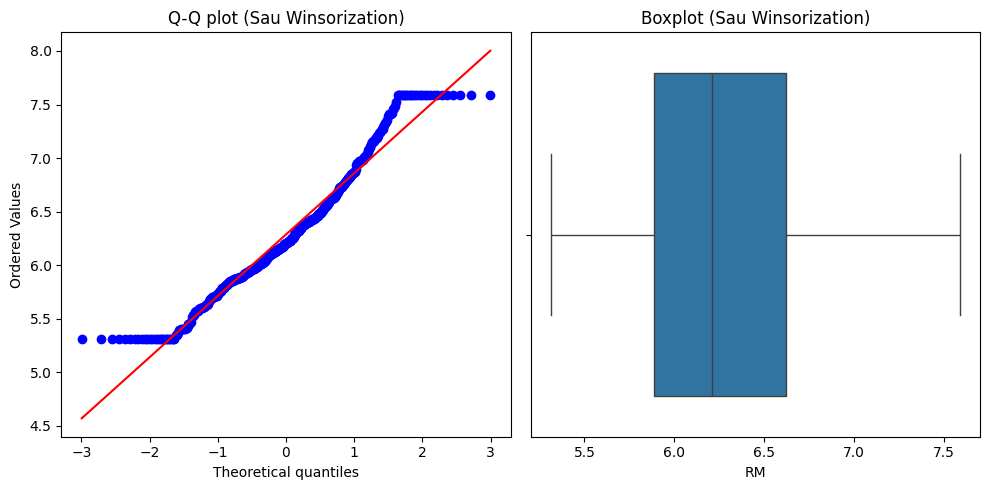

In [ ]:
# Tạo hàm winsorize để giới hạn các giá trị ngoại lai
#Hàm này thực hiện Winsorization cho một biến trong DataFrame.
#Thay thế các giá trị ngoài giới hạn (upper_limit và lower_limit) bằng chính giới hạn đó.
# Winsorization function
def winsorize(df, variable, upper_limit, lower_limit):
    #Đánh dấu vị trí các giá trị thay thế (TRUE), FALSE: không thay thế
    replaced_values = np.where(df[variable] > upper_limit, True,
                               np.where(df[variable] < lower_limit, True, False))
    #Thay thế giá trị ngoại lai
    df[variable] = np.where(df[variable] > upper_limit, upper_limit,
                            np.where(df[variable] < lower_limit, lower_limit, df[variable]))
    return replaced_values #trả về vị trí giá trị đã bị thay thế

# Tính giới hạn của biến RM
RM_upper_limit = boston['RM'].quantile(0.95)
RM_lower_limit = boston['RM'].quantile(0.05)

# Vẽ Q-Q plot trước khi Winsorization
plt.figure(figsize=(10, 5))

# Subplot 1: Q-Q plot trước khi Winsorization
plt.subplot(1, 2, 1)
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.title('Q-Q plot (Trước Winsorization)')

# Subplot 2: Boxplot trước khi Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(x=boston['RM'])
plt.title('Boxplot (Trước Winsorization)')

plt.tight_layout()
plt.show()

# Áp dụng Winsorization cho biến RM và nhận các giá trị bị thay thế
outliers_RM = winsorize(boston, 'RM', RM_upper_limit, RM_lower_limit)

# In ra số lượng giá trị đã bị thay thế (True trong mảng outliers_RM)
print(f"Số lượng giá trị bị thay thế trong biến RM: {np.sum(outliers_RM)}")

# Vẽ Q-Q plot và Boxplot sau khi Winsorization
plt.figure(figsize=(10, 5))

# Subplot 1: Q-Q plot sau khi Winsorization (dữ liệu đã thay đổi)
plt.subplot(1, 2, 1)
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.title('Q-Q plot (Sau Winsorization)')

# Subplot 2: Boxplot sau khi Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(x=boston['RM'])
plt.title('Boxplot (Sau Winsorization)')

plt.tight_layout()
plt.show()

# **Phương pháp Zero- coding (Giới hạn biến ở mức tối thiểu bằng 0)**

**Giới thiệu**: Trong kinh tế lượng và thống kê, các
phương pháp Top-Coding và Bottom-Coding được sử dụng để kiểm soát dữ liệu bằng cách giới hạn các giá trị vượt quá một ngưỡng nhất định. Cụ thể, Top-Coding giới hạn các giá trị lớn hơn một mức tối đa, trong khi Bottom-coding giới hạn các giá trị nhỏ hơn một mức tối thiểu. Đây là một cách tiếp cận phổ biến khi xử lý dữ liệu ngoại lai, trong đó giá trị lớn hoặc nhỏ bất thường của biến số được cắt giảm để nằm trong các dữ liệu nằm trong khoảng giá trị hợp lý.

**Zero-coding**: là một dạng đặc biệt của Bottom-Coding, trong đó giá trị nhỏ nhất của biến được giới hạn ở mức bằng 0. Phương pháp này thường được áp dụng cho các biến không thể mang giá trị âm, chẳng hạn như độ tuổi hoặc thu nhập. Trong phần này sẽ minh họa cách áp dụng zero-coding trên một dataframe mẫu bằng cách sử dụng các thư viện pandas và Feature-engine.

In [ ]:
#Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tạo một dataframe mẫu với ba biến x, y và z, mỗi biến tuân theo phân phối chuẩn (normal distribution) và có một vài giá trị âm
# Thiết lập seed để đảm bảo tính tái lập
np.random.seed(29)

# Số lượng phần tử
n = 200

# Tạo các biến x, y, z
#np.random.randn(n) bắt đầu với mean = 0, std = 1.
#Thêm 2 (+ 2) dịch chuyển phân phối để giá trị trung bình (mean) trở thành 2.
x = np.random.randn(n) + 2

#Nhân 2 (* 2) tăng độ lệch chuẩn (std) lên 2.
#Thêm 4 (+ 4) dịch chuyển trung bình (mean) lên 4.
y = np.random.randn(n) * 2 + 4

#Nhân 5 (* 5) tăng độ lệch chuẩn (std) lên 5.
#Thêm 10 (+ 10) dịch chuyển trung bình (mean) lên 10
z = np.random.randn(n) * 5 + 10

# Hiển thị một vài giá trị mẫu
print("x:", x[:5])
print("y:", y[:5])
print("z:", z[:5])

x: [ 1.58251787  2.7060321   3.9159847  -0.1417555   2.71905689]
y: [6.90326003 4.93027879 4.68884042 3.48865217 2.38850082]
z: [ 9.69565535 14.36373267 15.8033548  17.40368229 20.85906865]


In [ ]:
#Lưu các biến x, y, và z vào một dataframe và đặt tên cột tương ứng
data = pd.DataFrame([x, y, z]).T
data.columns = ['x', 'y', 'z']

# Kiểm tra dataframe
print("\nDữ liệu của dataframe:")
print(data.head(200)) #có 200 phần tử cho mỗi biến x,y,z

#Kiểm tra giá trị nhỏ nhất của cột để kiểm tra có âm hay không
data.min()



Dữ liệu của dataframe:
            x         y          z
0    1.582518  6.903260   9.695655
1    2.706032  4.930279  14.363733
2    3.915985  4.688840  15.803355
3   -0.141755  3.488652  17.403682
4    2.719057  2.388501  20.859069
..        ...       ...        ...
195  2.772856  3.477070   5.136161
196  2.984154  5.197983  23.231700
197  2.148736  3.397818  10.421169
198  2.331706  3.904605  17.854279
199  2.405062  3.422974  11.057447

[200 rows x 3 columns]


,0
x,-1.505401
y,-0.901451
z,-1.552986


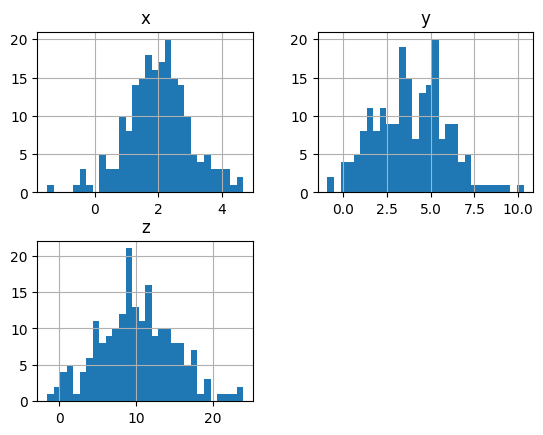

In [ ]:
#Hàm này vẽ biểu đồ histogram cho từng cột trong dataframe
data.hist(bins=30) #Dữ liệu chia thành 30 khoảng bằng nhau
plt.show()

x    0.0
y    0.0
z    0.0
dtype: float64


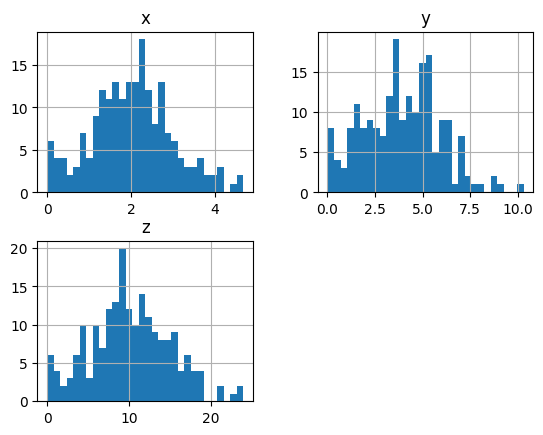

In [ ]:
#Thực hiện zero-coding
# Capping giá trị âm của từng cột về 0
data.loc[data['x'] < 0, 'x'] = 0
data.loc[data['y'] < 0, 'y'] = 0
data.loc[data['z'] < 0, 'z'] = 0

# Kiểm tra lại giá trị nhỏ nhất của từng cột
print(data.min())

#Vẽ biểu đồ histogram cho từng cột trong dataframe sau khi thực hiện zero-coding
data.hist(bins=30) #Dữ liệu chia thành 30 khoảng bằng nhau
plt.show()

# **Nhận xét, kết luận**

Nhận xét, đánh giá các phương pháp thực hiện:
1. **Phương pháp Trimming:**
Xác định và loại bỏ các giá trị ngoại lai khỏi tập dữ liệu.
Các giá trị nằm ngoài ngưỡng nhất định (ví dụ: dựa trên quy tắc IQR) sẽ bị loại bỏ hoàn toàn.
*   **Ưu điểm:**
- Giúp làm sạch dữ liệu một cách triệt để, loại bỏ hoàn toàn các giá trị không hợp lý.
- Tăng độ chính xác trong các mô hình phân tích hoặc học máy, đặc biệt là với các thuật toán nhạy cảm với dữ liệu ngoại lai (như hồi quy tuyến tính).
*   **Nhược điểm:**
- Có thể làm mất thông tin quan trọng, đặc biệt khi các giá trị ngoại lai thực sự mang ý nghĩa thực tiễn.
- Giảm kích thước dữ liệu, có thể ảnh hưởng đến tính đại diện của tập dữ liệu nếu loại bỏ quá nhiều giá trị.
*   **Ứng dụng:**
- Dữ liệu ngoại lai thực sự không phù hợp hoặc không có ý nghĩa (ví dụ: lỗi nhập liệu).
- Tập dữ liệu có kích thước lớn, việc loại bỏ một số giá trị không ảnh hưởng đáng kể đến tính đại diện của dữ liệu.
2. **Phương pháp Winsorization**
Chuyển đổi các giá trị cực trị (outliers) về một giá trị cận biên, chẳng hạn như ngưỡng trên hoặc dưới (ví dụ: 5% giá trị nhỏ nhất hoặc lớn nhất).
Dữ liệu ngoại lai không bị loại bỏ hoàn toàn mà được làm "giảm nhẹ" tác động.
*   **Ưu điểm:**
- Bảo toàn toàn bộ dữ liệu, không làm mất bất kỳ điểm dữ liệu nào.
- Giảm ảnh hưởng tiêu cực của giá trị ngoại lai đối với các phép phân tích hoặc mô hình thống kê.
Duy trì tính đại diện của tập dữ liệu.
*   **Nhược điểm:**
- Có thể làm sai lệch giá trị thực của dữ liệu (dữ liệu bị điều chỉnh về giá trị ngưỡng).
- Cần lựa chọn cẩn thận ngưỡng cận biên (ví dụ: dựa trên phần trăm phân vị) để tránh làm thay đổi ý nghĩa thực tế của dữ liệu.
*   **Ứng dụng:**
- Khi dữ liệu ngoại lai mang thông tin quan trọng hoặc dữ liệu có ý nghĩa, nhưng cần giới hạn tác động tiêu cực của dữ liệu đến tập dữ liệu và mô hình huấn luyện.
- Sử dụng trong các bài toán yêu cầu bảo toàn toàn bộ dữ liệu, chẳng hạn như trong ngành tài chính hoặc bảo hiểm.
3. **Phương pháp Zero-Coding**
Giới hạn giá trị của biến ở mức tối thiểu là 0, tức là các giá trị âm sẽ được thay thế bằng 0. Thường được áp dụng cho các biến không thể có giá trị âm, như tuổi, thu nhập, thời gian...
*   **Ưu điểm:**
- Đơn giản, dễ thực hiện và hiệu quả trong việc xử lý dữ liệu âm không hợp lệ.
- Đảm bảo dữ liệu sau xử lý phù hợp với bối cảnh thực tế.
*   **Nhược điểm:**
- Không phù hợp với các biến mà giá trị âm vẫn mang ý nghĩa thực tiễn.
- Dễ gây mất thông tin nếu dữ liệu âm thực sự mang ý nghĩa quan trọng.
*   **Ứng dụng:**
- Khi biết chắc chắn rằng dữ liệu không thể có giá trị âm (ví dụ: các biến tuổi, thu nhập, lượng hàng bán ra...).
- Trong các bài toán mà giá trị âm không có ý nghĩa thực tế.
4. **So sánh và lựa chọn phương pháp phù hợp**
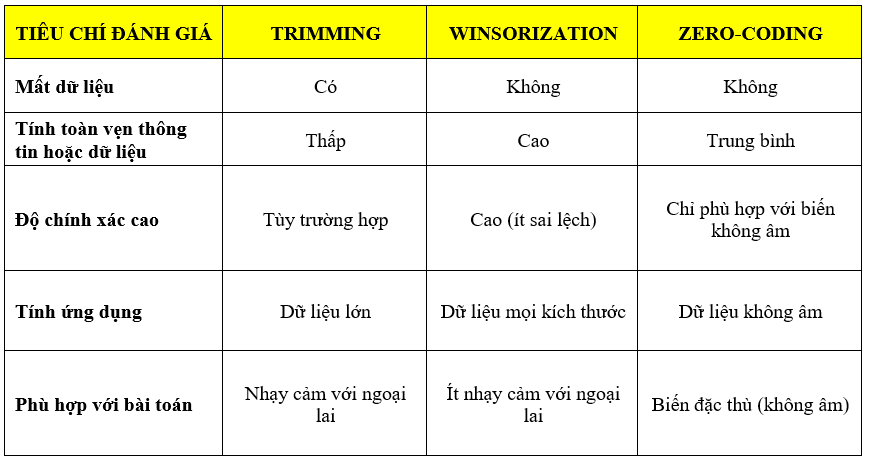

5. **Kết luận về lựa chọn phương pháp:**
*   Trimming: Dùng khi cần loại bỏ hoàn toàn các giá trị không phù hợp, đặc biệt khi dữ liệu có nhiều giá trị ngoại lai hoặc chứa lỗi rõ ràng.
*   Winsorization: Dùng khi muốn giảm tác động của giá trị ngoại lai nhưng vẫn bảo toàn thông tin, đặc biệt trong các bài toán yêu cầu giữ nguyên số lượng dữ liệu.
*   Zero-Coding: Dùng trong các trường hợp biến dữ liệu không thể có giá trị âm, chẳng hạn như các chỉ số về thời gian, tuổi, hoặc các số liệu tài chính không âm.





# **Tài liệu tham khảo**

*   [1]. [Galli, Soledad], Python Feature Engineering Cookbook, Over 70 Recipes for Creating, Engineering, and Transforming Features to Build Machine Learn
*  [2].https://svcuong.github.io/post/remove-outliers/
*   [3]. https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html


